## Loading data and preprocessing features 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('marketing_data.csv')

df['Income']=df[' Income ']
df['Income']=df.Income.str.replace('$','')
df['Income']=df.Income.str.replace(',','')
df['Income']=df.Income.astype("float")
df['Income'].fillna((df['Income'].median()), inplace=True)
df = df.drop([' Income '], axis=1)
df.drop(df.index[[527,513,827,2233]],inplace=True) 
df['LogIncome'] = np.log1p(df['Income'])


df.loc[df['Education']=='2n Cycle','Education']='Master'
df.loc[df['Education']=='Graduation','Education']='Bachelor'


df['NumChildren']  = df['Kidhome']+df['Teenhome']
df['HasChildren']=np.where(df.NumChildren> 0, 1, 0)


df['HasPartner']=np.where(((df.Marital_Status== 'Married')|(df.Marital_Status== 'Together')), 1, 0)

In [3]:
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])
df['age'] = 2014 - df['Year_Birth']

df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] +\
        +df['MntSweetProducts'] + df['MntGoldProds']
df['AcceptedCmpTot']=df['AcceptedCmp1']+ df['AcceptedCmp2']+ df['AcceptedCmp3']+ df['AcceptedCmp4']+\
       + df['AcceptedCmp5']
df['NumTotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases']+df['NumCatalogPurchases']+\
    df['NumStorePurchases']+df['NumWebVisitsMonth']

latest_date=(df["Dt_Customer"] + pd.to_timedelta(df['Recency'],'d')).max()
df['Len_Customer']=latest_date - df["Dt_Customer"]
df['Len_Customer']=df['Len_Customer'] / pd.to_timedelta(1, unit='D') 
df['MntSpentNorm']=df['MntTotal']/df['Len_Customer']

In [4]:
df[df.age>100]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,LogIncome,NumChildren,HasChildren,HasPartner,age,MntTotal,AcceptedCmpTot,NumTotalPurchases,Len_Customer,MntSpentNorm


In [5]:
df[df.Income>300000]

,ID,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,LogIncome,NumChildren,HasChildren,HasPartner,age,MntTotal,AcceptedCmpTot,NumTotalPurchases,Len_Customer,MntSpentNorm


In [6]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Income',
       'LogIncome', 'NumChildren', 'HasChildren', 'HasPartner', 'age',
       'MntTotal', 'AcceptedCmpTot', 'NumTotalPurchases', 'Len_Customer',
       'MntSpentNorm'],
      dtype='object')

### Feature scaling 

- Performing feature scaling bcuz of the outliers so that it will be accurate in further modeling.

In [10]:
cats = {'Education', 'Marital_Status', 
       'Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain','Country','HasChildren','HasPartner',}
# for var in cats:
#     df[var] = df[var].astype('category').cat.codes

nums = (set(df.columns) -set(cats)) - {'ID','Dt_Customer','LogIncome','MntSpentNorm','MntTotal', 'AcceptedCmpTot','NumTotalPurchases','Year_Birth'} #drop some highly correlated transformed vars

#X = df.drop(list(nums),axis=1) #Dropping Dt_Customer since this is causing problems in RF
X = df[list(nums)] #Dropping Dt_Customer since this is causing problems in RF

In [11]:
pd.set_option('display.max_columns', 500)

In [12]:
X.head()

,MntFruits,age,NumChildren,Recency,Income,MntGoldProds,MntFishProducts,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebVisitsMonth,MntWines,NumWebPurchases,MntSweetProducts,Len_Customer,MntMeatProducts
0,104,44,0,0,84835.0,218,111,4,1,6,1,189,4,189,110.0,379
1,5,53,0,0,57091.0,37,7,3,1,7,5,464,7,0,111.0,64
2,11,56,1,0,67267.0,30,15,2,1,5,2,134,3,2,144.0,59
3,0,47,2,0,32474.0,0,0,0,1,2,7,10,1,0,146.0,1
4,16,25,1,0,21474.0,34,11,1,2,2,7,6,3,0,179.0,24


In [13]:
np.shape(X)

(2236, 16)

#### Feature scaling as it has outlies and will use minmax scaler

In [15]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X)

In [16]:
num_components=np.shape(X)[1]

Elbow Method:


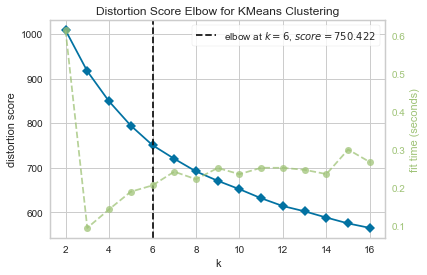

In [17]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print('Elbow Method:')
Elbow_M = KElbowVisualizer(KMeans(), k=num_components, random_seed=42) #for the 20 numeric
Elbow_M.fit(data_rescaled) 
Elbow_M.show();

- Above elbow method shows K values as 6 , using 6 clusters.

#### KMeans clusters analysis

In [18]:
n_clusters=6

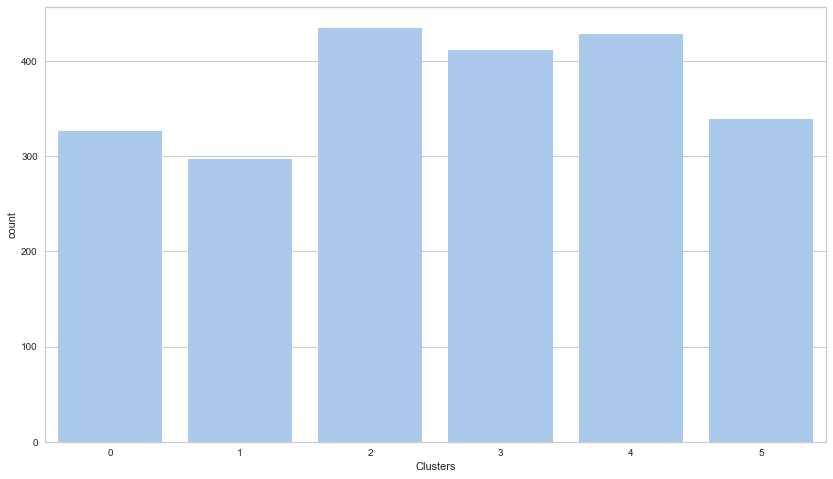

In [26]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Clusters'] = kmeans.fit_predict(data_rescaled)

# data_rescaled = pd.DataFrame(data_rescaled, columns = nums)

# data_rescaled['Clusters'] = df["Clusters"]

plt.figure(figsize=(14, 8))
sns.countplot(x='Clusters', data=df,hue=None,color= '#a1c9f4')
plt.show()

In [27]:
df.Clusters.value_counts()

2    435
4    428
3    411
5    339
0    326
1    297
Name: Clusters, dtype: int64

Text(0.5, 1.0, 'Clusters counts')

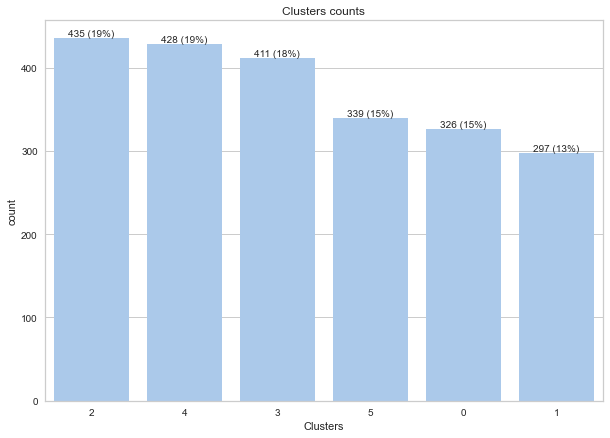

In [40]:
# Code hint from https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
plt.figure(figsize=(10, 7))

ax = sns.countplot(x=df['Clusters'], data=df,hue=None,color='#a1c9f4',order=df['Clusters'].value_counts(ascending=False).index)
        
abs_values = df['Clusters'].value_counts(ascending=False)
rel_values = df['Clusters'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]
ax.bar_label(container=ax.containers[0], labels=lbls)
ax.set_title("Clusters counts")


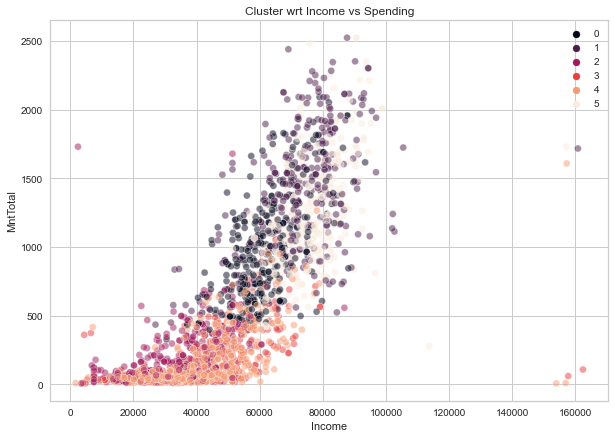

In [41]:
plt.figure(figsize=(10, 7))
palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.scatterplot(data = df,x=df["Income"], y=df["MntTotal"],hue=df["Clusters"],alpha=.5,palette=palette)

plot.set_title("Cluster wrt Income vs Spending")
plt.legend()
plt.show()

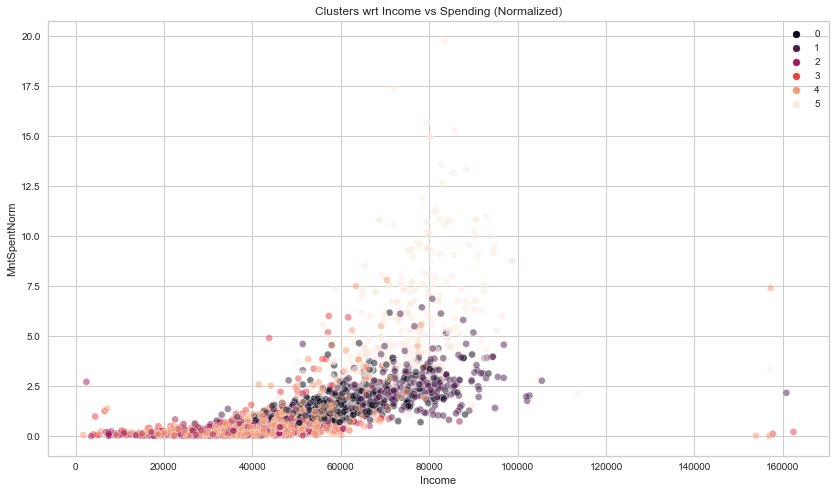

In [42]:
plt.figure(figsize=(14, 8))
palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.scatterplot(data = df,x=df["Income"], y=df["MntSpentNorm"],hue=df["Clusters"],alpha=.5,palette=palette)

plot.set_title("Clusters wrt Income vs Spending (Normalized)")
plt.legend()
plt.show()

In [43]:
df["Clusters"].value_counts()

2    435
4    428
3    411
5    339
0    326
1    297
Name: Clusters, dtype: int64

<AxesSubplot:>

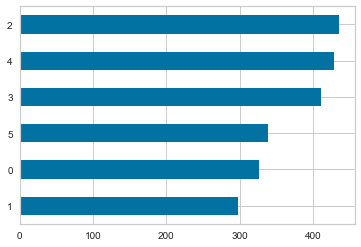

In [44]:
df.Clusters.value_counts().sort_values().plot(kind = 'barh')

#### Exploring some of clusters based on features 

In [45]:
groupsKmeans=df.groupby(['Clusters'])
groupsKmeans.agg(['count', 'sum', 'min', 'max', 'mean', 'std'])

ID                                               Year_Birth  \
         count      sum min    max         mean          std      count   
Clusters                                                                  
0          326  1733528  17  11088  5317.570552  3276.845904        326   
1          297  1663464   0  11112  5600.888889  3191.683766        297   
2          435  2522623   9  11187  5799.133333  3258.873936        435   
3          411  2344066   1  11191  5703.323601  3287.676399        411   
4          428  2316039  13  11188  5411.306075  3216.940225        428   
5          339  1917303  75  11101  5655.761062  3219.606037        339   

                                                     Kidhome               \
             sum   min   max         mean        std   count  sum min max   
Clusters                                                                    
0         640083  1943  1991  1963.444785   9.271380     326   76   0   2   
1         584753  1941  1995  1968.865320  13.058938     297    8   0   1   
2         858147  1946  1996  1972.751724  10.974120     435  306   0   2   
3         809879  1945  1992  1970.508516  10.708638     411  284   0   2   
4         842387  1940  1996  1968.193925  11.090315     428  304   0   2   
5         667207  1943  1995  1968.162242  13.131794     339   15   0   2   

                             Teenhome                                   \
              mean       std    count  sum min max      mean       std   
Clusters                                                                 
0         0.233129  0.437764      326  307   0   2  0.941718  0.407214   
1         0.026936  0.162170      297   57   0   2  0.191919  0.402948   
2         0.703448  0.495939      435  183   0   2  0.420690  0.521461   
3         0.690998  0.535921      411  228   0   2  0.554745  0.535378   
4         0.710280  0.556155      428  274   0   2  0.640187  0.561423   
5         0.044248  0.219846      339   84   0   2  0.247788  0.439155   

         Recency                                      MntWines               \
           count    sum min max       mean        std    count     sum  min   
Clusters                                                                      
0            326  16380   0  99  50.245399  27.075982      326  211267  115   
1            297  16716   1  99  56.282828  28.589135      297  178460    7   
2            435  20423   0  99  46.949425  26.278326      435   32042    0   
3            411   9084   0  53  22.102190  14.638048      411   36104    0   
4            428  32829  48  99  76.703271  14.331253      428   40045    0   
5            339  14392   0  99  42.454277  27.748023      339  182111    1   

                                       MntFruits                             \
           max        mean         std     count    sum min  max       mean   
Clusters                                                                      
0         1492  648.058282  313.523087       326   7845   0  142  24.064417   
1         1493  600.875421  302.747254       297  22824   0  199  76.848485   
2          462   73.659770   91.330736       435   3350   0   77   7.701149   
3          738   87.844282  132.988098       411   2094   0   60   5.094891   
4          934   93.563084  131.792215       428   2564   0   70   5.990654   
5         1478  537.200590  304.837625       339  20076   0  197  59.221239   

                    MntMeatProducts                                            \
                std           count     sum min   max        mean         std   
Clusters                                                                        
0         26.470631             326   56425  21   650  173.082822  108.917623   
1         49.813306             297  139282  64  1622  468.962963  256.208837   
2         11.114729             435   20009   1  1725   45.997701  118.077681   
3          8.238414             411   12134   0   257   29.523114

##### Q1: Finding out how much of each clusters has spent amounts on purchases

[316631.0, 423166.0, 76797.0, 62794.0, 73775.0, 401823.0]
['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']


<AxesSubplot:>

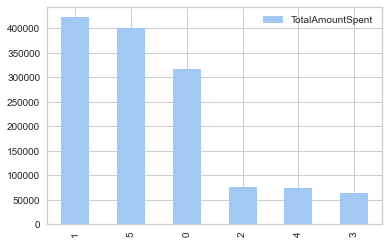

In [46]:
cluster_mnt_totals = [[]]*n_clusters

for i in range(n_clusters):
    cluster_i=df[df["Clusters"]==i]
    cluster_mnt_totals[i] = cluster_i.MntTotal.mean()*len(cluster_i)

print(cluster_mnt_totals) 

columns = ['cluster'+str(i) for i in range(n_clusters)]
print(columns)

df_cluster_mnt_totals = pd.DataFrame([cluster_mnt_totals], columns = ['cluster'+str(i) for i in range(n_clusters)])
df_cluster_mnt_totals=df_cluster_mnt_totals.T.reset_index().rename({0:'TotalAmountSpent'},axis=1)
df_cluster_mnt_totals.sort_values('TotalAmountSpent', ascending=False).plot.bar(color='#a1c9f4')

[562.0356274816252, 720.5741168756956, 117.4872710272772, 258.1228113801819, 291.3546628249603, 1747.3114942843993]
['cluster0', 'cluster1', 'cluster2', 'cluster3', 'cluster4', 'cluster5']


<AxesSubplot:>

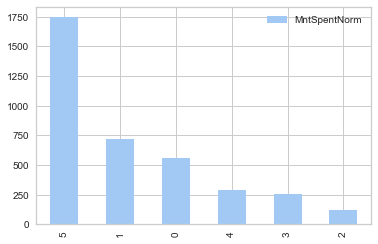

In [47]:
cluster_mnt_totals = [[]]*n_clusters

for i in range(n_clusters):
    cluster_i=df[df["Clusters"]==i]
    cluster_mnt_totals[i] = cluster_i.MntSpentNorm.mean()*len(cluster_i)

print(cluster_mnt_totals) 

columns = ['cluster'+str(i) for i in range(n_clusters)]
print(columns)

df_cluster_mnt_totals = pd.DataFrame([cluster_mnt_totals], columns = ['cluster'+str(i) for i in range(n_clusters)])

df_cluster_mnt_totals=df_cluster_mnt_totals.T.reset_index().rename({0:'MntSpentNorm'},axis=1)

df_cluster_mnt_totals.sort_values('MntSpentNorm', ascending=False).plot.bar(color='#a1c9f4')

- From both the above charts, it clear that the Clusters named 5, 1, and 0 has the maximun revenue

##### Now getting the distributions of Income from the clusters

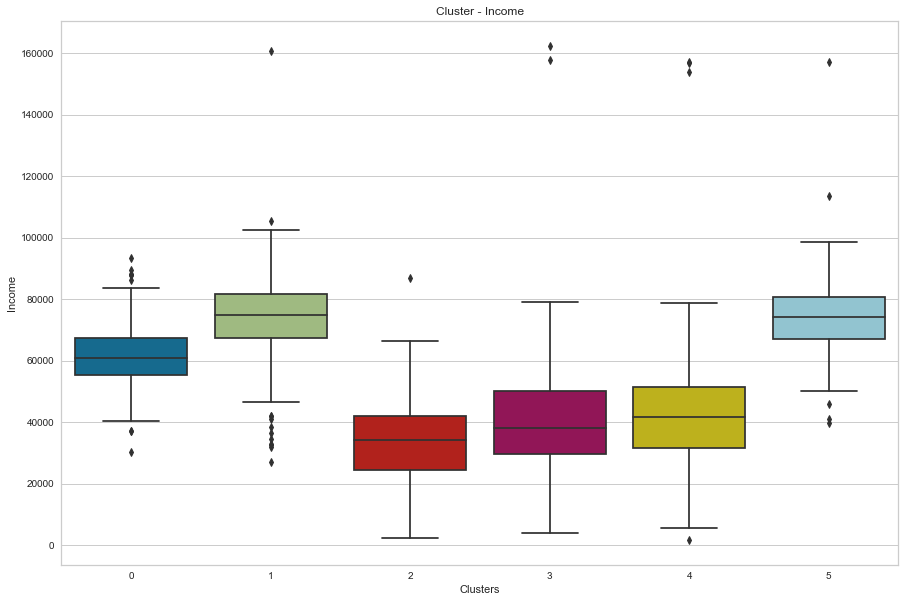

In [49]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Clusters", y="Income",data=df)
plot.set_title("Cluster - Income")
plt.show()

In [50]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Income,LogIncome,NumChildren,HasChildren,HasPartner,age,MntTotal,AcceptedCmpTot,NumTotalPurchases,Len_Customer,MntSpentNorm,Clusters
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,5589.008497,1968.898032,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,27.080501,43.983005,2.326029,4.087657,2.663238,5.795617,5.318873,0.072898,0.074687,0.072451,0.064401,0.013417,0.149374,0.008945,51952.614043,10.753375,0.950805,0.715116,0.644902,45.101968,605.986583,0.297853,20.191413,450.773256,1.653348,2.597048
std,3244.826887,11.703281,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,41.299504,52.061568,1.933032,2.779988,2.923898,3.251129,2.426886,0.260027,0.262944,0.259291,0.245520,0.115077,0.356536,0.094173,21411.466851,0.500319,0.752204,0.451460,0.478650,11.703281,601.865156,0.678737,7.291811,202.181561,2.173188,1.635449
min,0.000000,1940.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,7.456455,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000,0.000000,97.000000,0.009276,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35502.500000,10.477386,0.000000,0.000000,0.000000,37.000000,69.000000,0.000000,14.000000,277.750000,0.202060,1.000000
50%,5454.500000,1970.000000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51381.500000,10.847053,1.000000,1.000000,1.000000,44.000000,396.500000,0.000000,19.000000,453.000000,0.866443,3.000000
75%,8421.750000,1977.000000,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68275.750000,11.131325,1.000000,1.000000,1.000000,55.000000,1045.500000,0.000000,25.000000,626.000000,2.270000,4.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,162397.000000,11.997805,3.000000,1.000000,1.000000,74.000000,2525.000000,4.000000,46.000000,796.000000,19.788991,5.000000


##### Age numbers 

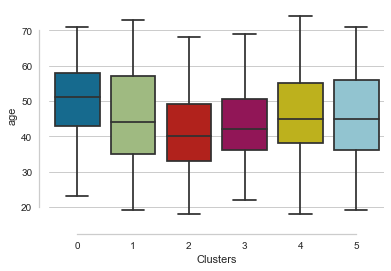

In [51]:
sns.boxplot(x="Clusters", y="age",
            data=df)
sns.despine(offset=10, trim=True)

<AxesSubplot:xlabel='Clusters', ylabel='NumChildren'>

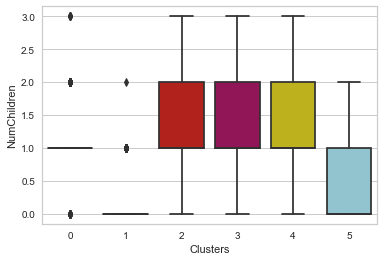

In [53]:
sns.boxplot(x="Clusters", y="NumChildren",data=df)

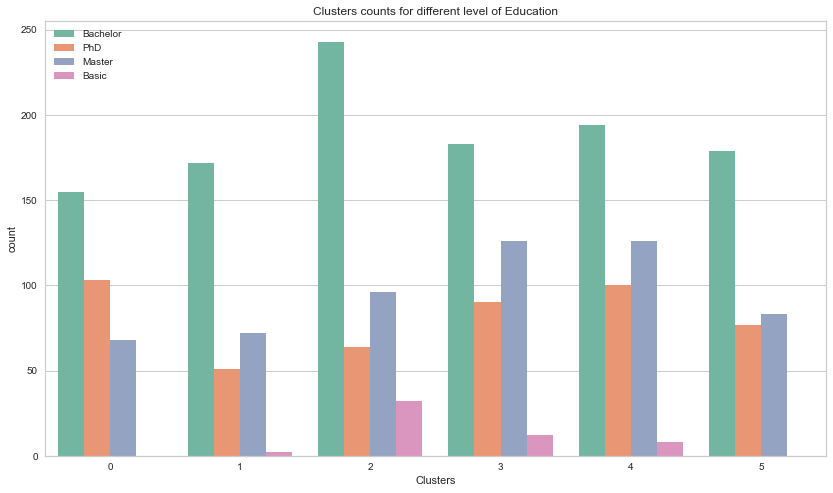

In [54]:
plt.figure(figsize=(14, 8))
palette=sns.color_palette("Set2")
plot = sns.countplot(x=df["Clusters"],hue=df["Education"], palette = palette)

plot.set_title("Clusters counts for different level of Education")
plt.legend()
plt.show()

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


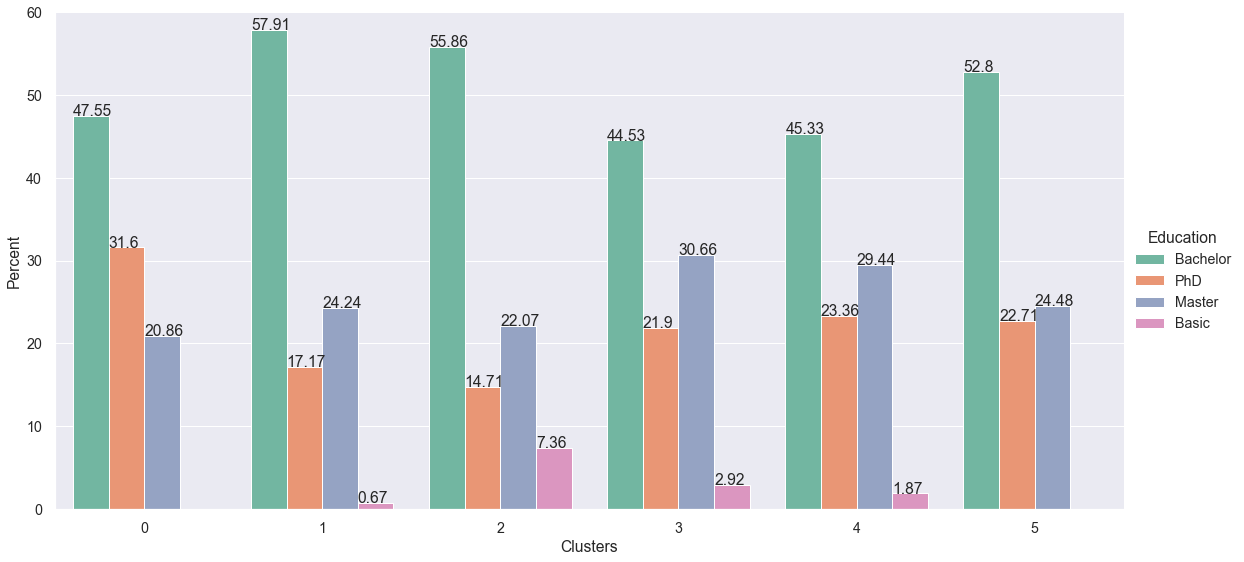

In [55]:
palette=sns.color_palette("Set2")
sns.set(font_scale = 1.3)

x,y = 'Clusters', 'Education'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette,height=8,aspect=2)
g.ax.set_ylim(0,60)

for p in g.ax.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

- As i compare these clusters mainly for Clusters 0,1,5 which has more contribution in generating revenue, education level of these customers in overall are more highly educated in clusters 5 follow up with clusters 0 and than cluster 1.

##### Clusters wrt Partners or couples

Text(0.5, 1.0, 'Cluster Profiles Based On Having a Partner')

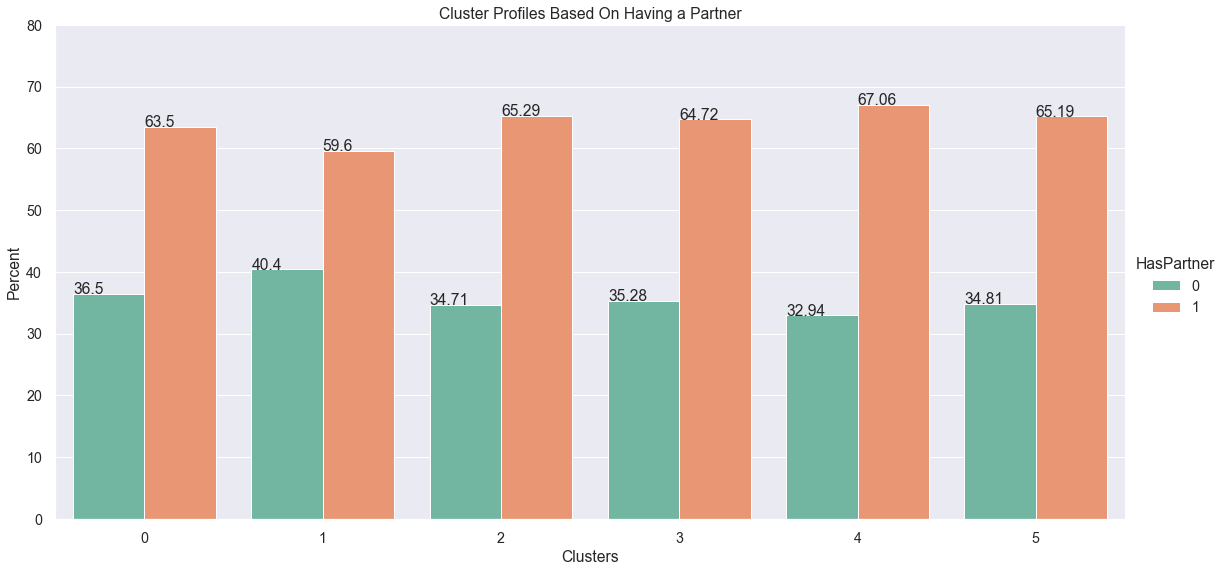

In [56]:
palette=sns.color_palette("Set2")
sns.set(font_scale = 1.3)

x,y = 'Clusters', 'HasPartner'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette,height=8,aspect=2)
g.ax.set_ylim(0,80)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) #+ '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)   
plt.title("Cluster Profiles Based On Having a Partner")

In [57]:
groupsKmeansEdu=df.groupby(['Clusters','Education']).agg(['count'])
groupsKmeansEdu

ID Year_Birth Marital_Status Kidhome Teenhome  \
                   count      count          count   count    count   
Clusters Education                                                    
0        Bachelor    155        155            155     155      155   
         Master       68         68             68      68       68   
         PhD         103        103            103     103      103   
1        Bachelor    172        172            172     172      172   
         Basic         2          2              2       2        2   
         Master       72         72             72      72       72   
         PhD          51         51             51      51       51   
2        Bachelor    243        243            243     243      243   
         Basic        32         32             32      32       32   
         Master       96         96             96      96       96   
         PhD          64         64             64      64       64   
3        Bachelor    183        183            183     183      183   
         Basic        12         12             12      12       12   
         Master      126        126            126     126      126   
         PhD          90         90             90      90       90   
4        Bachelor    194        194            194     194      194   
         Basic         8          8              8       8        8   
         Master      126        126            126     126      126   
         PhD         100        100            100     100      100   
5        Bachelor    179        179            179     179      179   
         Master       83         83             83      83       83   
         PhD          77         77             77      77       77   

                   Dt_Customer Recency MntWines MntFruits MntMeatProducts  \
                         count   count    count     count           count   
Clusters Education                                                          
0        Bachelor          155     155      155       155             155   
         Master             68      68       68        68              68   
         PhD               103     103      103       103             103   
1        Bachelor          172     172      172       172             172   
         Basic               2       2        2         2               2   
         Master             72      72       72        72              72   
         PhD                51      51       51        51              51   
2        Bachelor          243     243      243       243             243   
         Basic              32      32       32        32              32   
         Master             96      96       96        96              96   
         PhD                64      64       64        64              64   
3        Bachelor          183     183      183       183             183   
         Basic              12      12       12        12              12   
         Master            126     126      126       126             126   
         PhD                90      90       90        90              90   
4        Bachelor          194     194      194       194             194   
         Basic               8       8        8         8               8   
         Master            126     126      126       126             126   
         PhD               100     100      100       100             100   
5        Bachelor          179     179      179       179             179   
         Master             83      83       83        83              83   
         PhD                77      77       77        77              77   

                   MntFishProducts MntSweetProducts MntGoldProds  \
                             count            count        count   
Clusters Education                                                 
0        Bachelor              155              155          155   
         Master                 68              

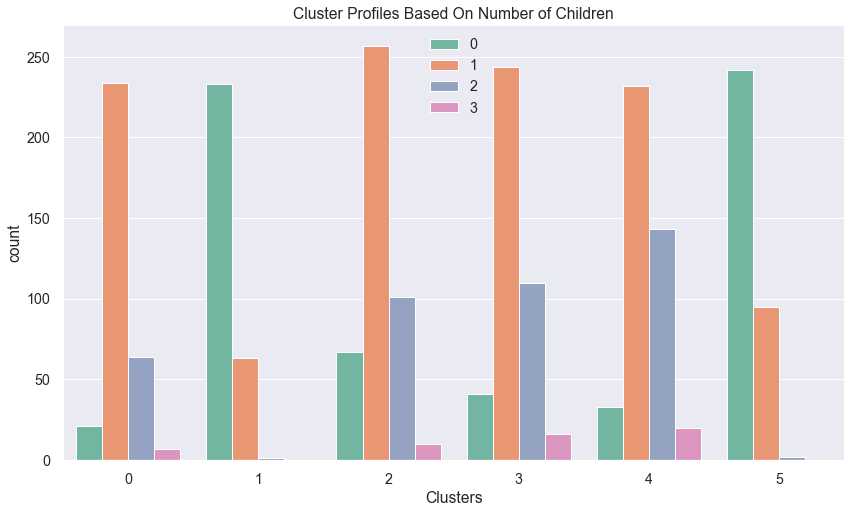

In [58]:
plt.figure(figsize=(14, 8))
palette=sns.color_palette("Set2")

plot = sns.countplot(x=df["Clusters"],hue=df["NumChildren"], palette = palette)

plot.set_title("Cluster Profiles Based On Number of Children")
plt.legend()
plt.show()

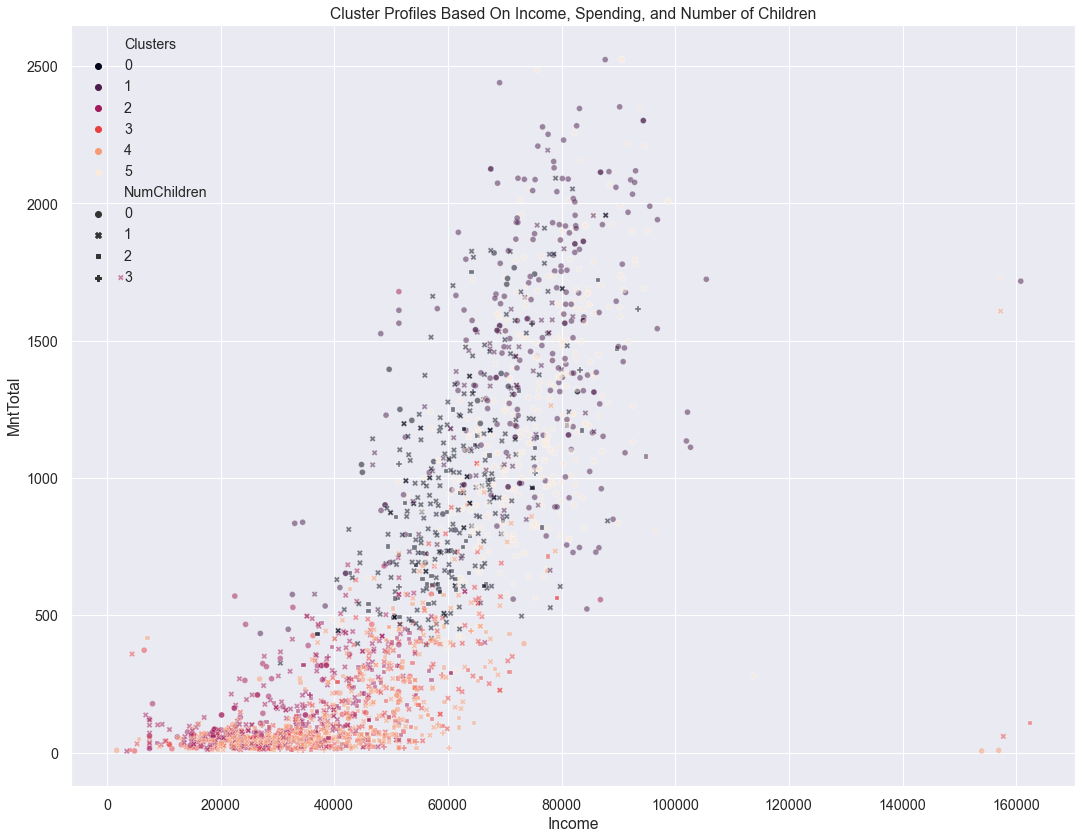

In [59]:
plt.figure(figsize=(18, 14))
palette=sns.color_palette("rocket", as_cmap=True)
plot = sns.scatterplot(data = df,x=df["Income"], y=df["MntTotal"],hue=df["Clusters"],alpha=.5,palette=palette,style=df['NumChildren'])

plot.set_title("Cluster Profiles Based On Income, Spending, and Number of Children")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Cluster Profiles Based On Number of Children')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


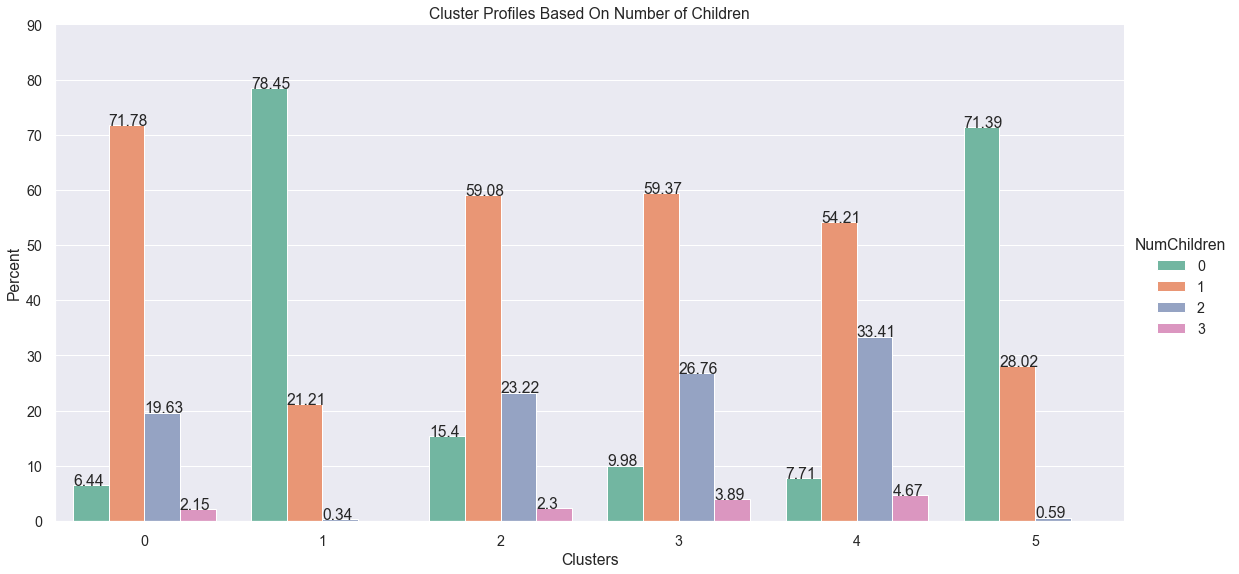

In [60]:
sns.set(font_scale = 1.3)
palette=sns.color_palette("Set2")

x,y = 'Clusters', 'NumChildren'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('Percent').reset_index()

g = sns.catplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette,height=8,aspect=2)
#g = sns.countplot(x=x,y='Percent',hue=y,kind='bar',data=df1,palette=palette,height=8,aspect=2)
#plot = sns.countplot(x=df["Clusters"],hue=df["NumChildren"], palette = palette)

g.ax.set_ylim(0,90)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) #+ '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.title('Cluster Profiles Based On Number of Children')


- Clusters 1,5 has more customers counts who has no childrens, well cluster 0 with one child has given a good revenue to the company.

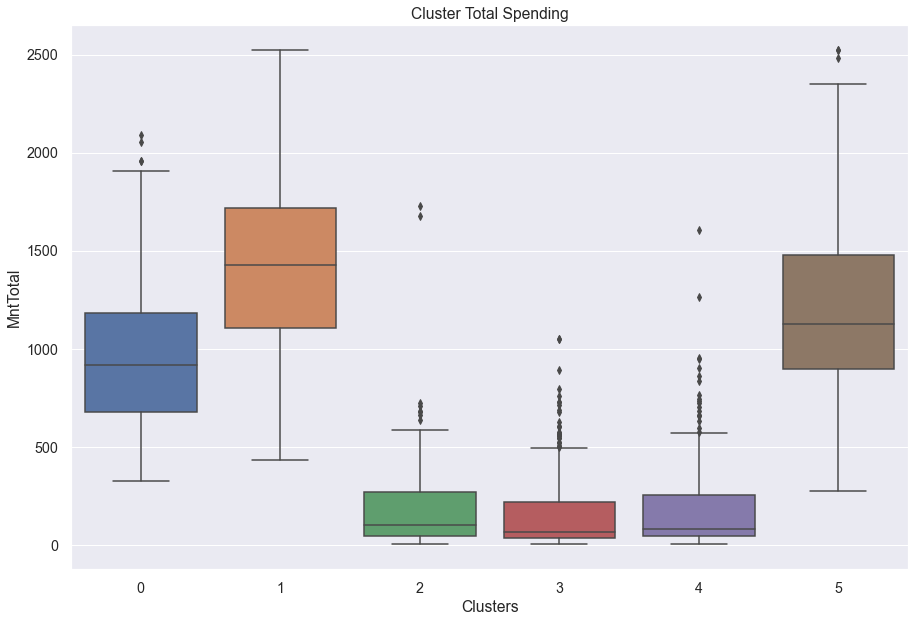

In [61]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Clusters", y="MntTotal",data=df)
plot.set_title("Cluster Total Spending")
plt.show()

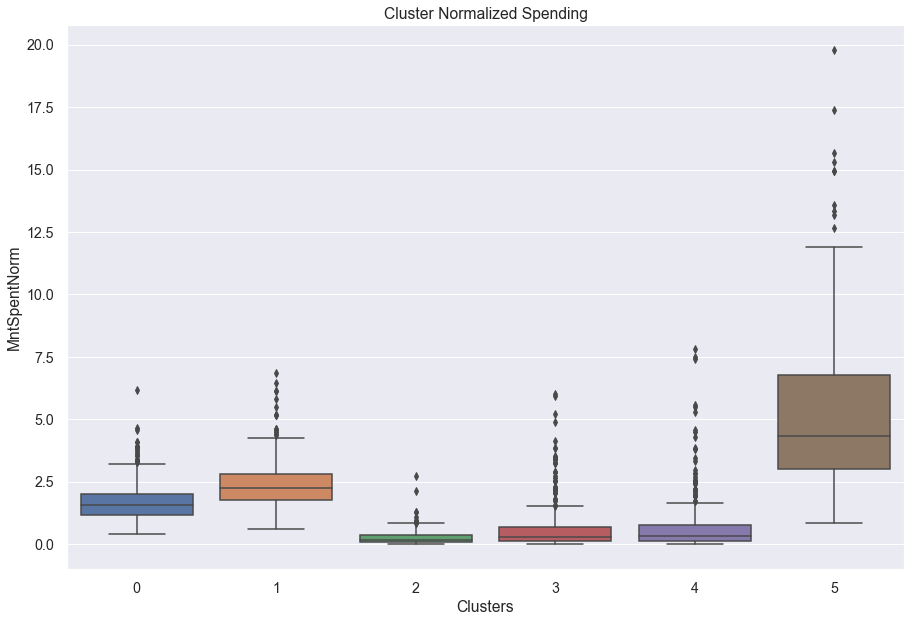

In [62]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Clusters", y="MntSpentNorm",data=df)
plot.set_title("Cluster Normalized Spending")
plt.show()

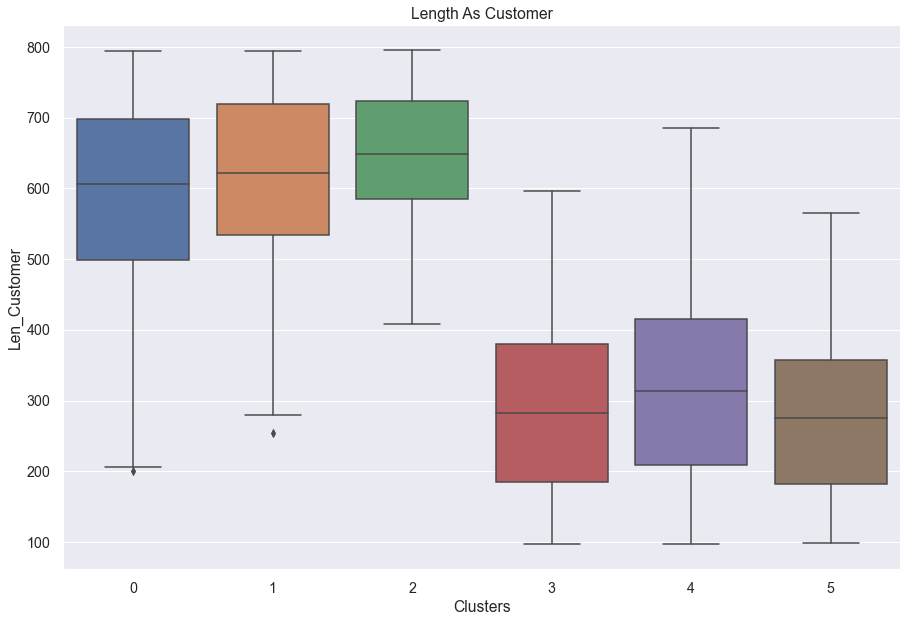

In [63]:
plt.figure(figsize=(15, 10))
palette=sns.color_palette("rocket", as_cmap=True)

plot=sns.boxplot(x="Clusters", y="Len_Customer",data=df)
plot.set_title("Length As Customer")
plt.show()

##### Normalising the products and deals wrt to customers to check some different patterns


In [64]:
df['MntWinesNorm']=df['MntWines']/df['Len_Customer']

df['MntFruitsNorm']=df['MntFruits']/df['Len_Customer']

df['MntMeatProductsNorm']=df['MntMeatProducts']/df['Len_Customer']

df['MntFishProductsNorm']=df['MntFishProducts']/df['Len_Customer']

df['MntSweetProductsNorm']=df['MntSweetProducts']/df['Len_Customer']

df['MntGoldProdsNorm']=df['MntGoldProds']/df['Len_Customer']

df['NumDealsPurchasesNorm']=df['NumDealsPurchases']/df['Len_Customer']

df['NumWebPurchasesNorm']=df['NumWebPurchases']/df['Len_Customer']

df['NumStorePurchasesNorm']=df['NumStorePurchases']/df['Len_Customer']

df['NumWebVisitsMonthNorm']=df['NumWebVisitsMonth']/df['Len_Customer']

df['NumCatalogPurchasesNorm']=df['NumCatalogPurchases']/df['Len_Customer']

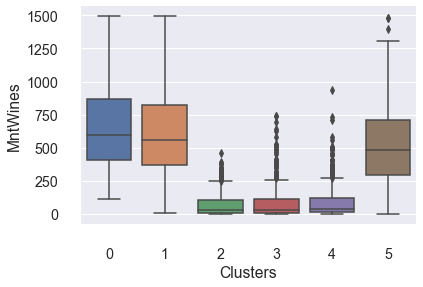

In [65]:
sns.boxplot(x="Clusters", y="MntWines",
            data=df)
sns.despine(offset=10, trim=True)

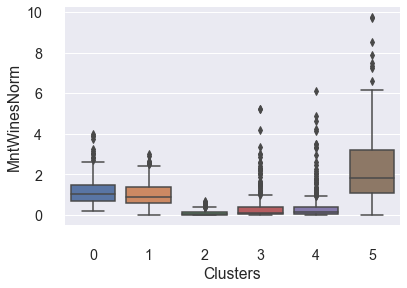

In [66]:
sns.boxplot(x="Clusters", y="MntWinesNorm",
            data=df)
sns.despine(offset=10, trim=True)

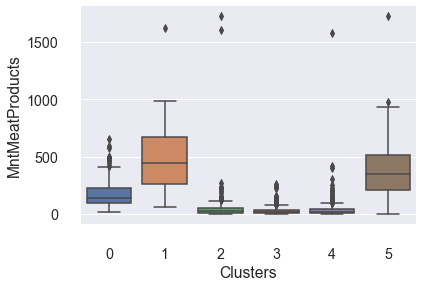

In [67]:
sns.boxplot(x="Clusters", y="MntMeatProducts",
            data=df)
sns.despine(offset=10, trim=True)

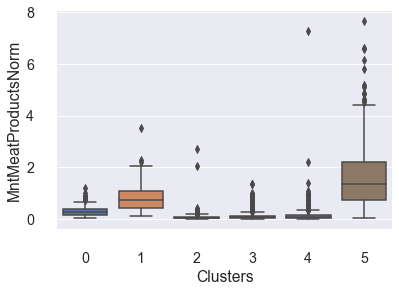

In [68]:
sns.boxplot(x="Clusters", y="MntMeatProductsNorm",
            data=df)
sns.despine(offset=10, trim=True)

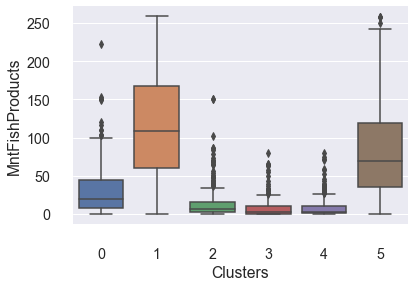

In [69]:
sns.boxplot(x="Clusters", y="MntFishProducts",
            data=df)
sns.despine(offset=10, trim=True)

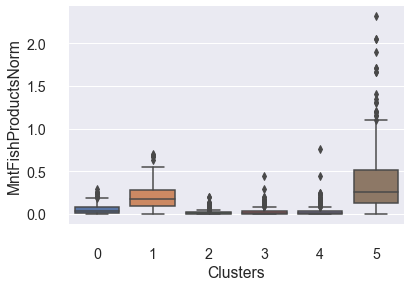

In [70]:
sns.boxplot(x="Clusters", y="MntFishProductsNorm",
            data=df)
sns.despine(offset=10, trim=True)

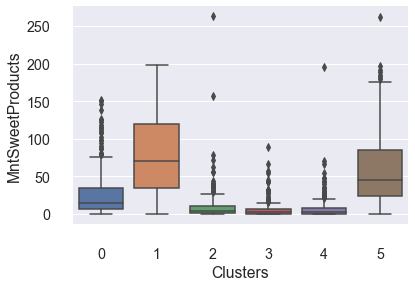

In [71]:
sns.boxplot(x="Clusters", y="MntSweetProducts",
            data=df)
sns.despine(offset=10, trim=True)

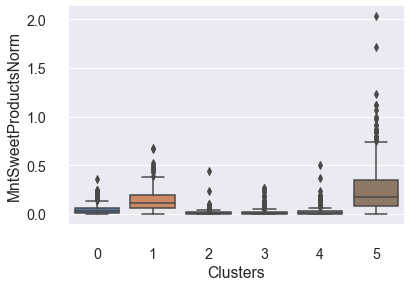

In [72]:
sns.boxplot(x="Clusters", y="MntSweetProductsNorm",
            data=df)
sns.despine(offset=10, trim=True)

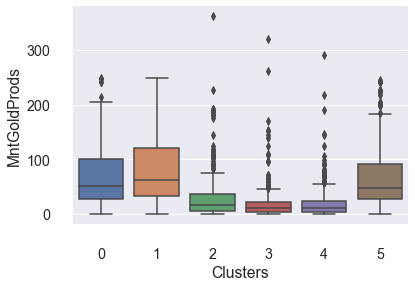

In [73]:
sns.boxplot(x="Clusters", y="MntGoldProds",
            data=df)
sns.despine(offset=10, trim=True)

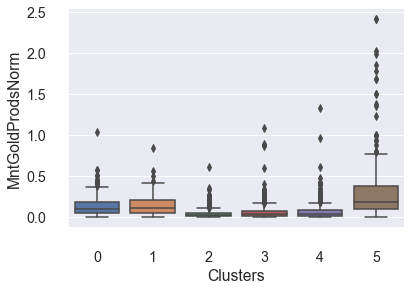

In [74]:
sns.boxplot(x="Clusters", y="MntGoldProdsNorm",
            data=df)
sns.despine(offset=10, trim=True)

- From above all the dist plots i can clearly say that Clusters 5,1 has generated a good amount of revenue.

### Purchases based on WEB, STORE and CATALOGs

Text(0.5, 1.0, 'No. of Purchases via WEB by Clusters')

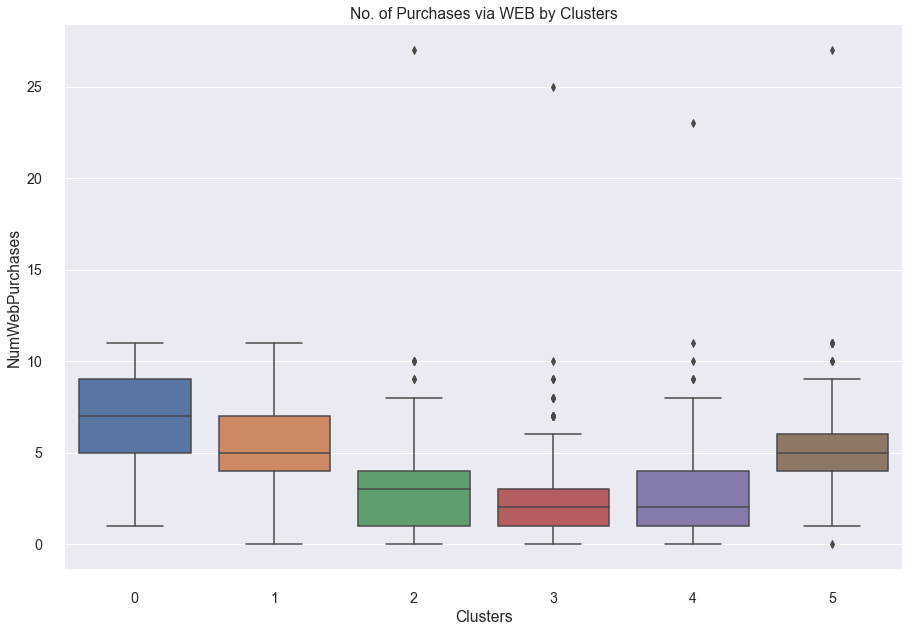

In [75]:
plt.figure(figsize=(15, 10))
sns.boxplot(x="Clusters", y="NumWebPurchases",data=df)
sns.despine(offset=10, trim=True)

plt.title("No. of Purchases via WEB by Clusters")

Text(0.5, 1.0, 'No. of Purchases via WEB by Cluster (Normalized)')

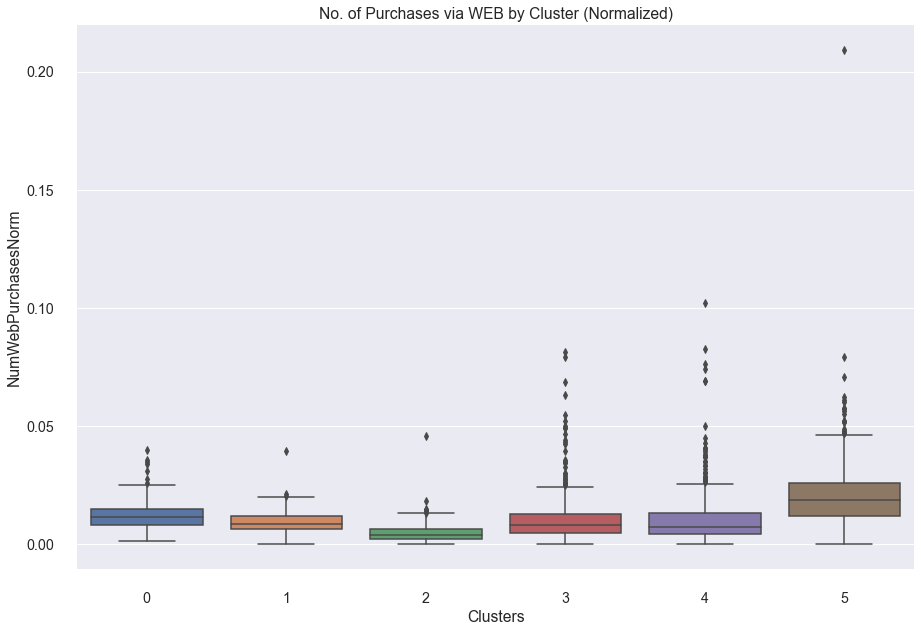

In [77]:
plt.figure(figsize=(15, 10))

sns.boxplot(x="Clusters", y="NumWebPurchasesNorm",data=df)
sns.despine(offset=10, trim=True)
plt.title("No. of Purchases via WEB by Cluster (Normalized)")

- Cluster 0 is active on the web overall, followed by 1 and 5. 
- When normalized, Cluster 5 are the most active on the web.

Text(0.5, 1.0, 'No. of Purchases via Catalog by Cluster')

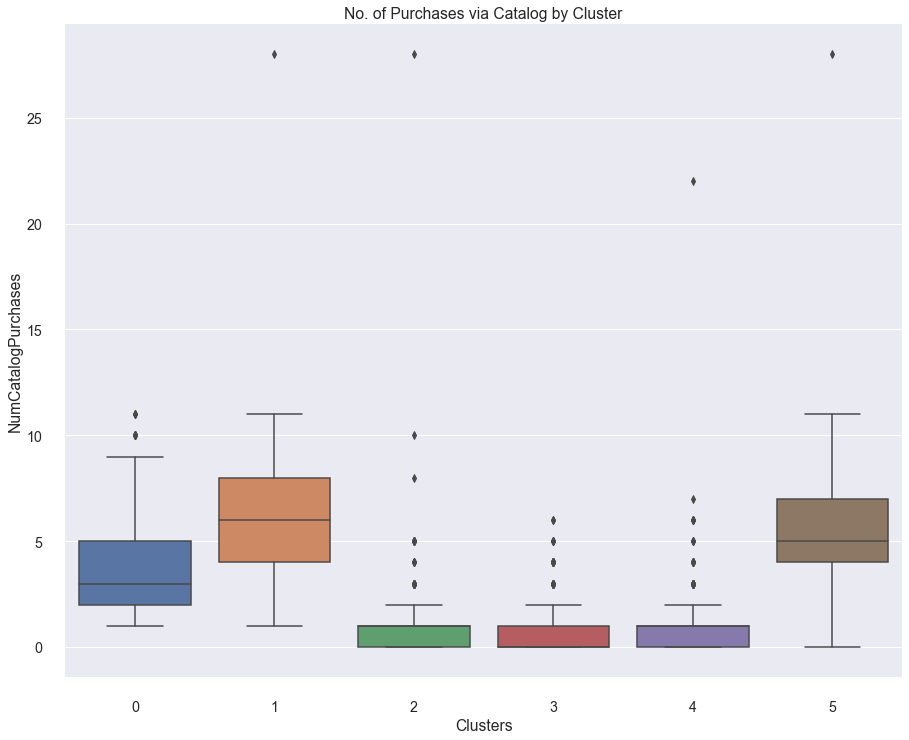

In [78]:
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumCatalogPurchases",data=df)
sns.despine(offset=10, trim=True)
plt.title("No. of Purchases via Catalog by Cluster")

Text(0.5, 1.0, 'No. of Purchases via Catalog by Cluster (Normalized)')

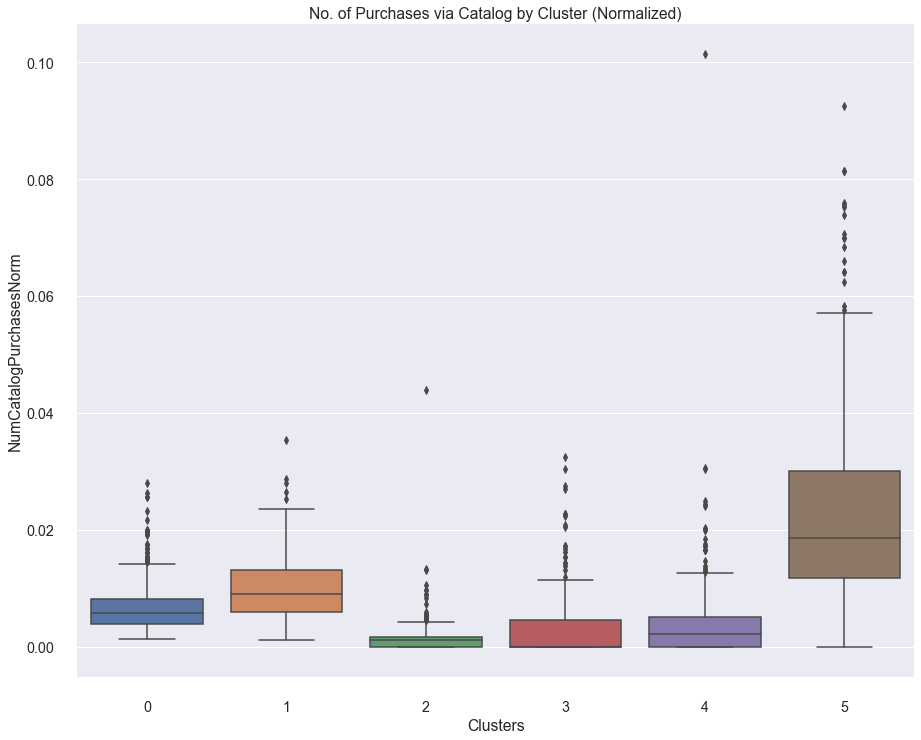

In [79]:
plt.figure(figsize=(15, 12))
sns.boxplot(x="Clusters", y="NumCatalogPurchasesNorm",data=df)
sns.despine(offset=10, trim=True)
plt.title("No. of Purchases via Catalog by Cluster (Normalized)")

- Cluster 5 are the most active catalog users overall, followed by Clusters 1 and 5.
- When normalized, Cluster 5 are the most active catalog users.

Text(0.5, 1.0, 'No. of Purchases via Stores by Cluster')

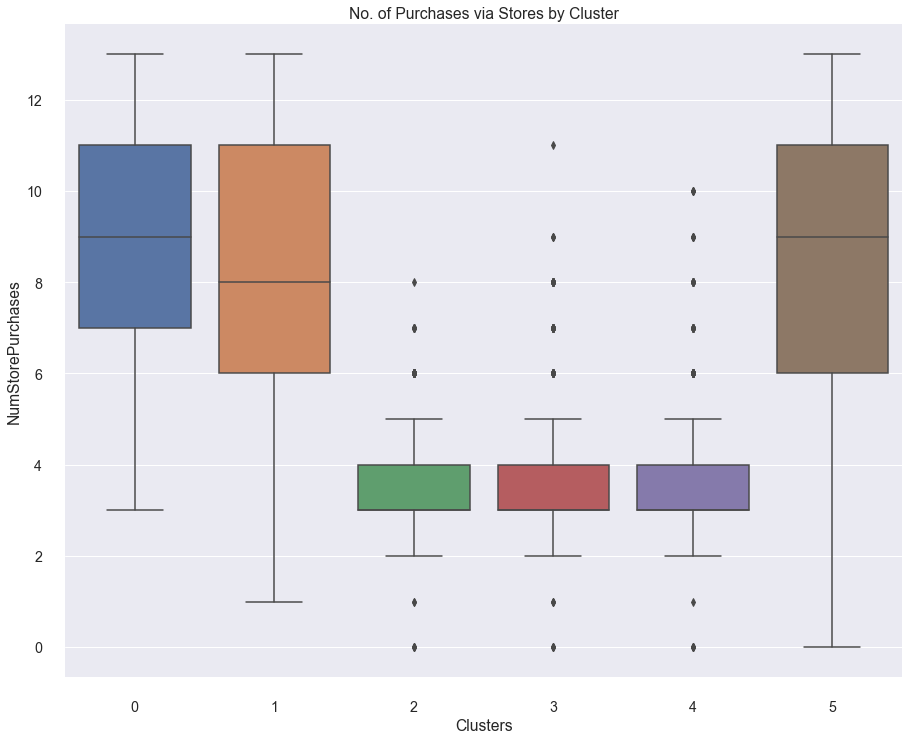

In [80]:
plt.figure(figsize=(15, 12))
sns.boxplot(x="Clusters", y="NumStorePurchases",data=df)
sns.despine(offset=10, trim=True)
plt.title("No. of Purchases via Stores by Cluster")

Text(0.5, 1.0, 'No. of Purchases via Stores by Cluster(Normalized)')

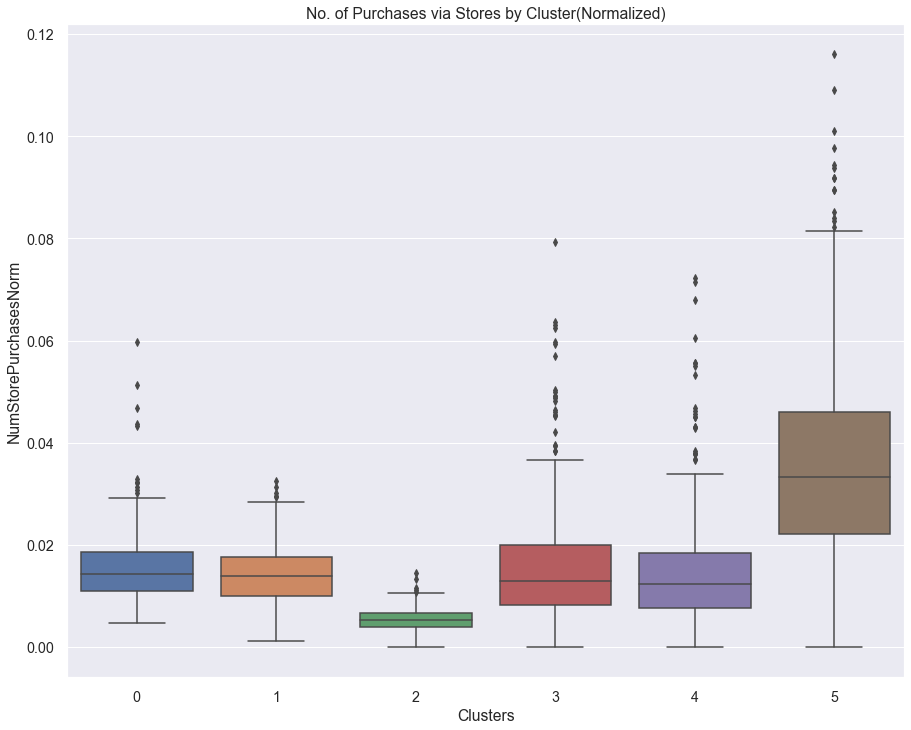

In [81]:
plt.figure(figsize=(15, 12))
sns.boxplot(x="Clusters", y="NumStorePurchasesNorm",data=df)
plt.title("No. of Purchases via Stores by Cluster(Normalized)")

- Cluster 5 customers shop the most in store, followed by Clusters 0 and 1.

Text(0.5, 1.0, 'Numbers of Web Visits by Cluster')

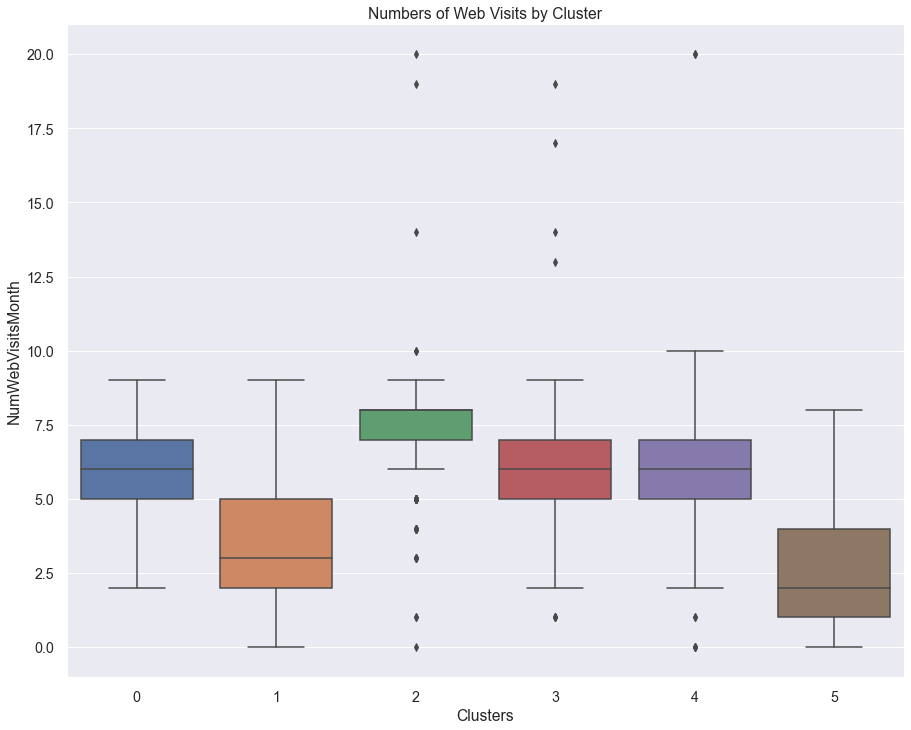

In [82]:
plt.figure(figsize=(15, 12))
sns.boxplot(x="Clusters", y="NumWebVisitsMonth",data=df)
plt.title("Numbers of Web Visits by Cluster")

## Average amount spent per purchase

Text(0.5, 1.0, 'Average Spent per Purchase by Cluster')

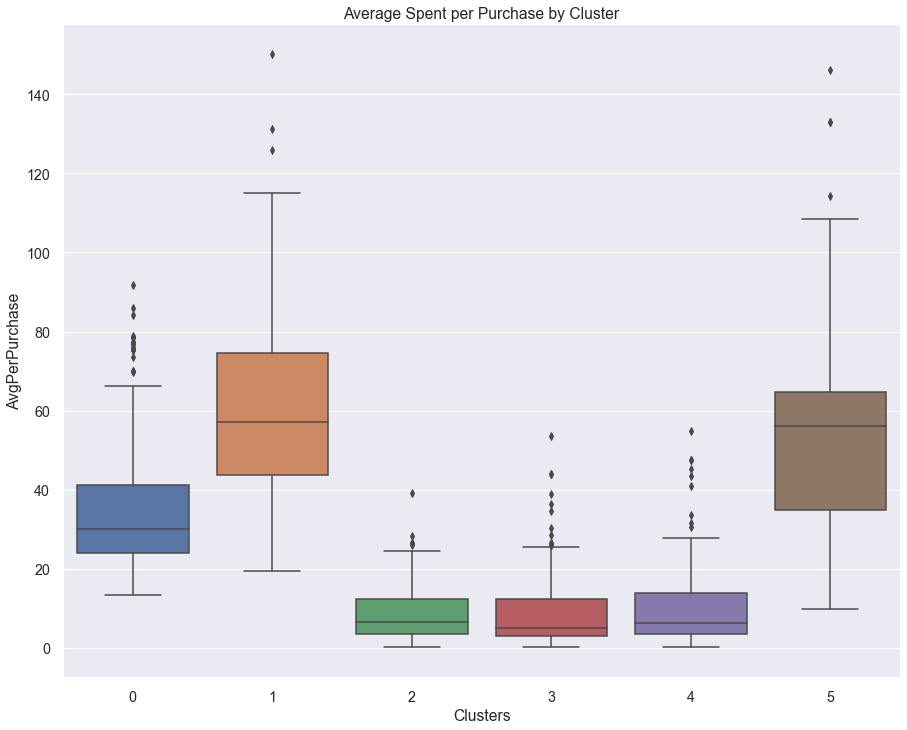

In [85]:
df['AvgPerPurchase'] = df['MntTotal']/df['NumTotalPurchases']
df=df[df['AvgPerPurchase']<175]
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="AvgPerPurchase",data=df)
plt.title("Average Spent per Purchase by Cluster")

- The median amounts spent per purhase by Clusters 1 and 5 are similar, but Cluster 5 makes more purchases when normalized by length spent as customer

Text(0.5, 1.0, 'Average Spent per Purchase by Cluster')

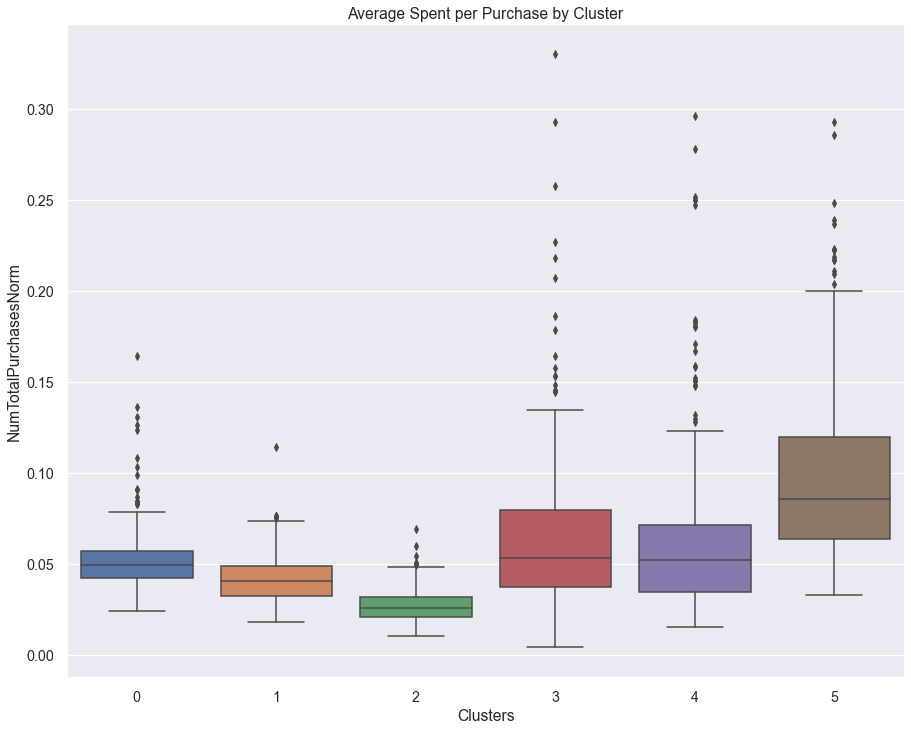

In [86]:
df['NumTotalPurchasesNorm']=df['NumTotalPurchases']/df['Len_Customer']
plt.figure(figsize=(15, 12))

sns.boxplot(x="Clusters", y="NumTotalPurchasesNorm",data=df)
plt.title("Average Spent per Purchase by Cluster")

### Insights from the analysis of clusters of customers purchases and behaviours

- Clusters 1 and 5 are the most valued groups that generated more revenue, where it shows that couples with no childrens spend a lot.
- Clusters 2,3,4,5 seems to be the new customers.
- Clusters 0,1,2 being the customers from the start and being purchasing on consistent basis so keep them engaged with positiev store experiences.
- Clusters 0,1, 5 customers are highly educated so i recommend to keep them active with more deals on web page.
- Seems that clusters 2,3,4 have childers so they might be tight with high spendings so i recmmond to provide more in store offers.
- Attracting high spending customers mainly in 5,0,1 for more revenue in future purchases.

### Future work 

- More analysis has to be done on campaign feature to get more info about attracting more customers.
- More focus need to be done on generating profit and new customers engagements.
